# DIGS 20006/30006 : NLP Assignment 7

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
#coding=utf-8
import jieba
import nltk
nltk.download('stopwords')
import zh_core_web_sm
import os
import sys
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tianchushu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# imports and set up logging
import gensim 
import logging
import glob, os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
# directory containing all source texts for training the model 
my_dir="/Users/tianchushu/Desktop/NLP/corpus/"

import glob, os

doc = []
os.chdir(my_dir)

for filename in glob.glob("*.txt"):
    filedata = open(filename, 'r').read()
    print(filename + " = " + str(len(filedata)) + " chars") 
    doc.append(filedata)

ccw.txt = 84 chars
cah.txt = 77 chars
cbs.txt = 59 chars
cbd.txt = 59 chars
cbe.txt = 58 chars
cca.txt = 78 chars
cbr.txt = 65 chars
cai.txt = 71 chars
ccv.txt = 61 chars
cak.txt = 70 chars
cbp.txt = 55 chars
cct.txt = 73 chars
cbg.txt = 58 chars
ccc.txt = 55 chars
ccb.txt = 45 chars
cbf.txt = 59 chars
ccu.txt = 60 chars
cbq.txt = 55 chars
caj.txt = 70 chars
cbb.txt = 59 chars
cay.txt = 59 chars
ccf.txt = 47 chars
can.txt = 67 chars
cbu.txt = 71 chars
ccq.txt = 55 chars
ccp.txt = 55 chars
cbt.txt = 76 chars
cao.txt = 71 chars
ccg.txt = 77 chars
cax.txt = 47 chars
cbc.txt = 59 chars
cce.txt = 73 chars
cba.txt = 59 chars
caz.txt = 59 chars
ccr.txt = 50 chars
cam.txt = 84 chars
cbv.txt = 71 chars
cbw.txt = 72 chars
cal.txt = 76 chars
ccs.txt = 71 chars
ccd.txt = 55 chars
fileaj.txt = 147 chars
cdp.txt = 36 chars
cec.txt = 57 chars
cdg.txt = 61 chars
cdf.txt = 59 chars
ceb.txt = 59 chars
cdq.txt = 60 chars
fileak.txt = 123 chars
fileai.txt = 131 chars
cds.txt = 79 chars
cdd.txt = 58 chars


In [5]:
df = pd.DataFrame(doc)
df.columns = ['content']

In [6]:
df

,content
0,南楼令塞外重九\n古木向人秋，惊蓬掠鬓稠。是重阳、何处堪愁。记得当年惆怅事，正风雨，下南楼。...
1,临江仙\n昨夜个人曾有约，严城玉漏三更。一钩新月几疏星。夜阑犹未寝，人静鼠窥灯。\n原是瞿唐...
2,相见欢\n相逢不语，一朵芙蓉著秋雨。小晕红潮，斜溜鬟心只凤翘。\n待将低唤，直为凝情恐人见。...
3,采桑子\n拨灯书尽红笺也，依旧无聊。玉漏迢迢，梦里寒花隔玉箫。\n几竿修竹三更雨，叶叶萧萧。...
4,采桑子\n凉生露气湘弦润，暗滴花梢。帘影谁摇，燕蹴风丝上柳条。\n舞镜匣开频掩，檀粉慵调。朝...
5,忆江南宿双林禅院有感\n心灰尽，有发未全僧。风雨消磨生死别，似曾相识只孤檠，情在不能醒。\n...
6,摊破浣溪沙\n风絮飘残已化萍，泥莲刚倩藕丝萦；珍重别拈香一瓣，记前生。\n人到情多情转薄，而...
7,虞美人\n春情只到梨花薄，片片催零落。夕阳何事近黄昏，不道人间犹有未招魂。\n银笺别梦当时句...
8,采桑子九日\n深秋绝塞谁相忆，木叶萧萧。乡路迢迢。六曲屏山和梦遥。\n佳时倍惜风光别，不为登...
9,虞美人\n银床淅沥青梧老，粉秋蛩扫。采香行处蹙连钱，拾得翠翘何恨不能言。\n回廊一寸相思地，...


In [7]:
df.shape

(130, 1)

In [8]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [9]:
df["content_cutted"] = df.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
2019-02-22 15:43:48,766 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0d/k2cqq0217yl4b1cg6yyg6gh80000gn/T/jieba.cache
2019-02-22 15:43:48,771 : DEBUG : Loading model from cache /var/folders/0d/k2cqq0217yl4b1cg6yyg6gh80000gn/T/jieba.cache
Loading model cost 0.827 seconds.
2019-02-22 15:43:49,596 : DEBUG : Loading model cost 0.827 seconds.
Prefix dict has been built succesfully.
2019-02-22 15:43:49,597 : DEBUG : Prefix dict has been built succesfully.


In [10]:
df.content_cutted.head()

0    南楼 令 塞外 重九 \n 古木向 人秋 ， 惊蓬 掠 鬓 稠 。 是 重阳 、 何处 堪愁...
1    临江仙 \n 昨夜 个人 曾 有 约 ， 严城玉漏 三 更 。 一钩 新月 几疏星 。 夜阑...
2    相见 欢 \n 相逢 不语 ， 一朵 芙蓉 著 秋雨 。 小晕 红潮 ， 斜溜鬟 心 只凤 ...
3    采桑子 \n 拨灯 书 尽红笺 也 ， 依旧 无聊 。 玉漏 迢迢 ， 梦里 寒花 隔玉箫 ...
4    采桑子 \n 凉生 露气 湘弦润 ， 暗滴 花梢 。 帘影 谁 摇 ， 燕蹴风丝 上 柳条 ...
Name: content_cutted, dtype: object

In [11]:
df["content_cutted"] = df["content_cutted"].replace('\t', '')
df["content_cutted"] = df["content_cutted"].replace('\n', '')
df["content_cutted"] = df["content_cutted"].replace('\u3000', '')

In [24]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  
# Convert to list
data = df.content_cutted.values.tolist()
for d in data:
    d = re.sub(r'[^\w\s\d]',' ', d) 
data_words = list(sent_to_words(data))
print(data_words[:1])


[['南楼', '塞外', '重九', '古木向', '人秋', '惊蓬', '重阳', '何处', '堪愁', '记得', '当年', '惆怅', '风雨', '南楼', '断梦', '几能', '香魂', '一哭', '怪凉', '空满', '霜落', '乌啼浑', '偏想', '风流']]


In [13]:
stop_words = []

# 2.  Create bigram and trigrams

In [30]:
%%time

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])
print('\n')

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

CPU times: user 34 ms, sys: 1.46 ms, total: 35.4 ms
Wall time: 34.3 ms


In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [70]:
%%time
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
#corpus.filter_n_most_frequent(2)

# View
print(corpus[2])


[(46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)]
CPU times: user 7.48 ms, sys: 197 µs, total: 7.68 ms
Wall time: 7.6 ms


In [71]:
len(id2word)

1997

In [72]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('一哭', 1),
  ('乌啼浑', 1),
  ('人秋', 1),
  ('何处', 1),
  ('偏想', 1),
  ('几能', 1),
  ('南楼', 2),
  ('古木向', 1),
  ('堪愁', 1),
  ('塞外', 1),
  ('当年', 1),
  ('怪凉', 1),
  ('惆怅', 1),
  ('惊蓬', 1),
  ('断梦', 1),
  ('空满', 1),
  ('记得', 1),
  ('重九', 1),
  ('重阳', 1),
  ('霜落', 1),
  ('风流', 1),
  ('风雨', 1),
  ('香魂', 1)]]

In [73]:
%%time

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           iterations=100,
                                           per_word_topics=True)


pprint(lda_model.print_topics())

[(0,
  '0.015*"夕阳" + 0.015*"当时" + 0.013*"鸳鸯" + 0.013*"蝶恋花" + 0.010*"分明" + '
  '0.010*"采桑子" + 0.009*"往事" + 0.009*"容易" + 0.007*"萧萧" + 0.006*"菩萨"'),
 (1,
  '0.014*"清平乐" + 0.009*"西风" + 0.008*"夜雨" + 0.008*"不语" + 0.008*"无语" + '
  '0.008*"樱桃" + 0.008*"欢期" + 0.008*"一抹" + 0.008*"画屏" + 0.008*"不许"'),
 (2,
  '0.014*"萧萧" + 0.012*"生查子" + 0.008*"浣溪沙" + 0.008*"无聊" + 0.008*"秋天" + '
  '0.007*"采桑子" + 0.006*"如潮" + 0.006*"杏花" + 0.006*"灯花" + 0.006*"乱山"'),
 (3,
  '0.020*"浣溪沙" + 0.018*"天涯" + 0.012*"衰草" + 0.011*"西风" + 0.009*"盈盈" + '
  '0.006*"生怜" + 0.006*"几时" + 0.006*"残阳" + 0.006*"何时" + 0.006*"长条"'),
 (4,
  '0.014*"菩萨" + 0.008*"金缕" + 0.008*"屏山" + 0.008*"吹散" + 0.008*"阑干" + 0.008*"庭院" '
  '+ 0.008*"此情" + 0.008*"画角" + 0.008*"一声" + 0.007*"隔花"'),
 (5,
  '0.011*"清瘦" + 0.011*"夜寒" + 0.011*"悲咽" + 0.011*"萧寺" + 0.011*"碧海" + 0.004*"知道" '
  '+ 0.004*"旧时" + 0.004*"人心" + 0.004*"那堪" + 0.004*"倾城"'),
 (6,
  '0.013*"落花" + 0.013*"西风" + 0.012*"当时" + 0.012*"黄花" + 0.007*"从此" + 0.007*"依依" '
  '+ 0.007*"相思" + 0.007*"寂寂" + 0.007*"寒云" +

In [75]:
%%time

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\n')


Perplexity:  -8.475365446769555

Coherence Score:  0.48250617008209173


CPU times: user 554 ms, sys: 49 ms, total: 603 ms
Wall time: 657 ms


In [77]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    #contents = pd.Series(text)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,0,4.0,0.9786,"菩萨, 金缕, 屏山, 吹散, 阑干, 庭院, 此情, 画角, 一声, 隔花"
1,1,8.0,0.9787,"伤心, 几许, 秋雨, 西风, 菩萨, 牧马, 黄花, 清平乐, 一样, 无声"
2,2,1.0,0.9724,"清平乐, 西风, 夜雨, 不语, 无语, 樱桃, 欢期, 一抹, 画屏, 不许"
3,3,0.0,0.9769,"夕阳, 当时, 鸳鸯, 蝶恋花, 分明, 采桑子, 往事, 容易, 萧萧, 菩萨"
4,4,2.0,0.9728,"萧萧, 生查子, 浣溪沙, 无聊, 秋天, 采桑子, 如潮, 杏花, 灯花, 乱山"
5,5,5.0,0.9778,"清瘦, 夜寒, 悲咽, 萧寺, 碧海, 知道, 旧时, 人心, 那堪, 倾城"
6,6,8.0,0.9768,"伤心, 几许, 秋雨, 西风, 菩萨, 牧马, 黄花, 清平乐, 一样, 无声"
7,7,0.0,0.9808,"夕阳, 当时, 鸳鸯, 蝶恋花, 分明, 采桑子, 往事, 容易, 萧萧, 菩萨"
8,8,0.0,0.9769,"夕阳, 当时, 鸳鸯, 蝶恋花, 分明, 采桑子, 往事, 容易, 萧萧, 菩萨"
9,9,7.0,0.9706,"相思, 一程, 销魂, 不是, 模糊, 冷雨, 旧时, 惟有, 知否, 薄情"


In [78]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords
0,0.0,0.9903,"夕阳, 当时, 鸳鸯, 蝶恋花, 分明, 采桑子, 往事, 容易, 萧萧, 菩萨"
1,1.0,0.9874,"清平乐, 西风, 夜雨, 不语, 无语, 樱桃, 欢期, 一抹, 画屏, 不许"
2,2.0,0.9853,"萧萧, 生查子, 浣溪沙, 无聊, 秋天, 采桑子, 如潮, 杏花, 灯花, 乱山"
3,3.0,0.9768,"浣溪沙, 天涯, 衰草, 西风, 盈盈, 生怜, 几时, 残阳, 何时, 长条"
4,4.0,0.9871,"菩萨, 金缕, 屏山, 吹散, 阑干, 庭院, 此情, 画角, 一声, 隔花"
5,5.0,0.9880,"清瘦, 夜寒, 悲咽, 萧寺, 碧海, 知道, 旧时, 人心, 那堪, 倾城"
6,6.0,0.9801,"落花, 西风, 当时, 黄花, 从此, 依依, 相思, 寂寂, 寒云, 脉脉"
7,7.0,0.9781,"相思, 一程, 销魂, 不是, 模糊, 冷雨, 旧时, 惟有, 知否, 薄情"
8,8.0,0.9895,"伤心, 几许, 秋雨, 西风, 菩萨, 牧马, 黄花, 清平乐, 一样, 无声"
9,9.0,0.9870,"燕子, 一片, 不成, 小院, 南乡子, 冷香, 十分, 花丛, 一双, 如许"


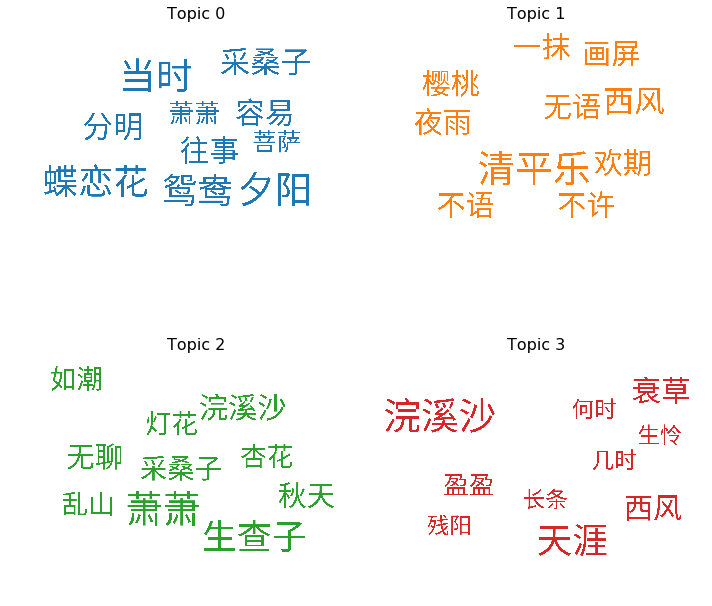

In [79]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  font_path='/Users/tianchushu/Downloads/NotoSansCJKsc-Regular.otf',
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, random_state):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=random_state, # = set.seed
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)
#         model = gensim.models.wrappers.LdaMallet(mallet_path,
#                                               corpus=corpus,
#                                               num_topics=num_topics,
#                                               id2word=id2word,
#                                               per_word_topics=False)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        co_value = coherencemodel.get_coherence()
        coherence_values.append(co_value)
        print(num_topics, co_value)

    return model_list, coherence_values

In [47]:
%%time
# Can take a long time to run.
start = 10
limit = 45
step = 5
random_state = 30
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready,
                                                        start=start, limit=limit, step=step, random_state=random_state)

10 0.3630688012568214
15 0.2765614873729289
20 0.30394161385406915
25 0.3376680916238603
30 0.3381833291764294
35 0.3424730851601061
40 0.37777110529757796
CPU times: user 10.6 s, sys: 308 ms, total: 10.9 s
Wall time: 11.2 s


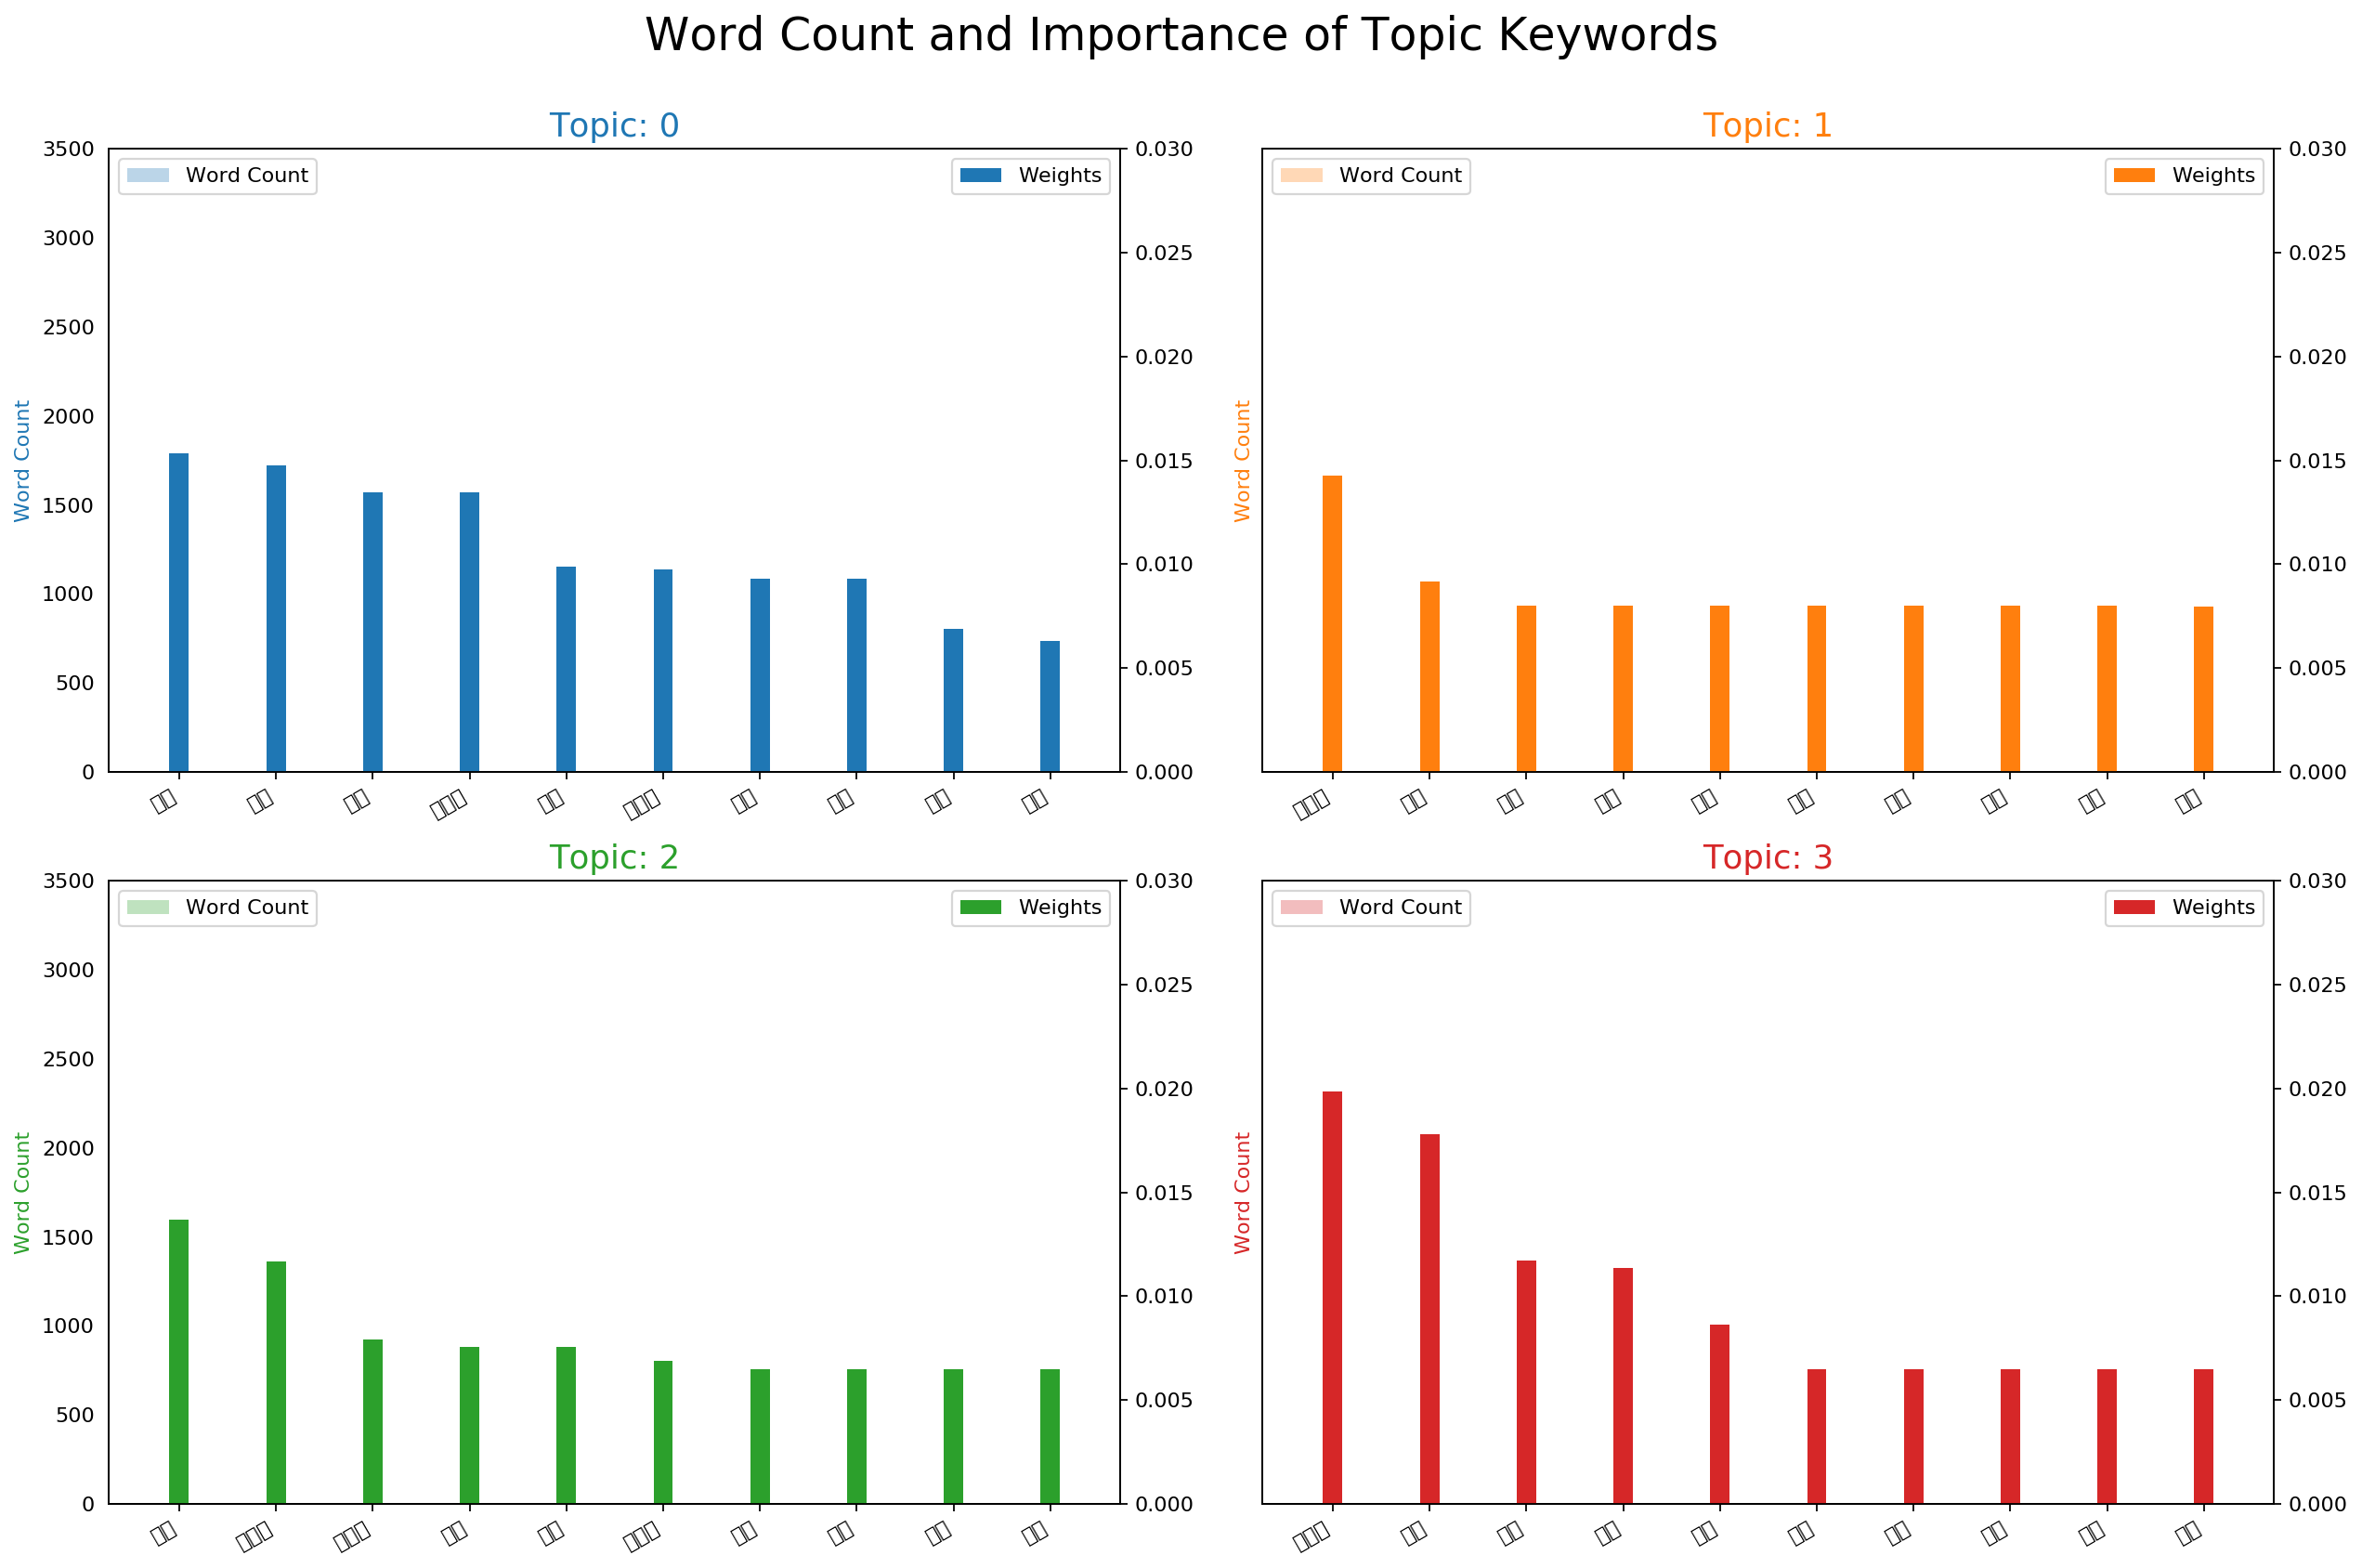

In [103]:
# -*- coding: utf-8 -*-
from collections import Counter
from pyplotz.pyplotz import PyplotZ

pltz = PyplotZ()
pltz.enable_chinese()

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [101]:
type(df['word'][0])

str

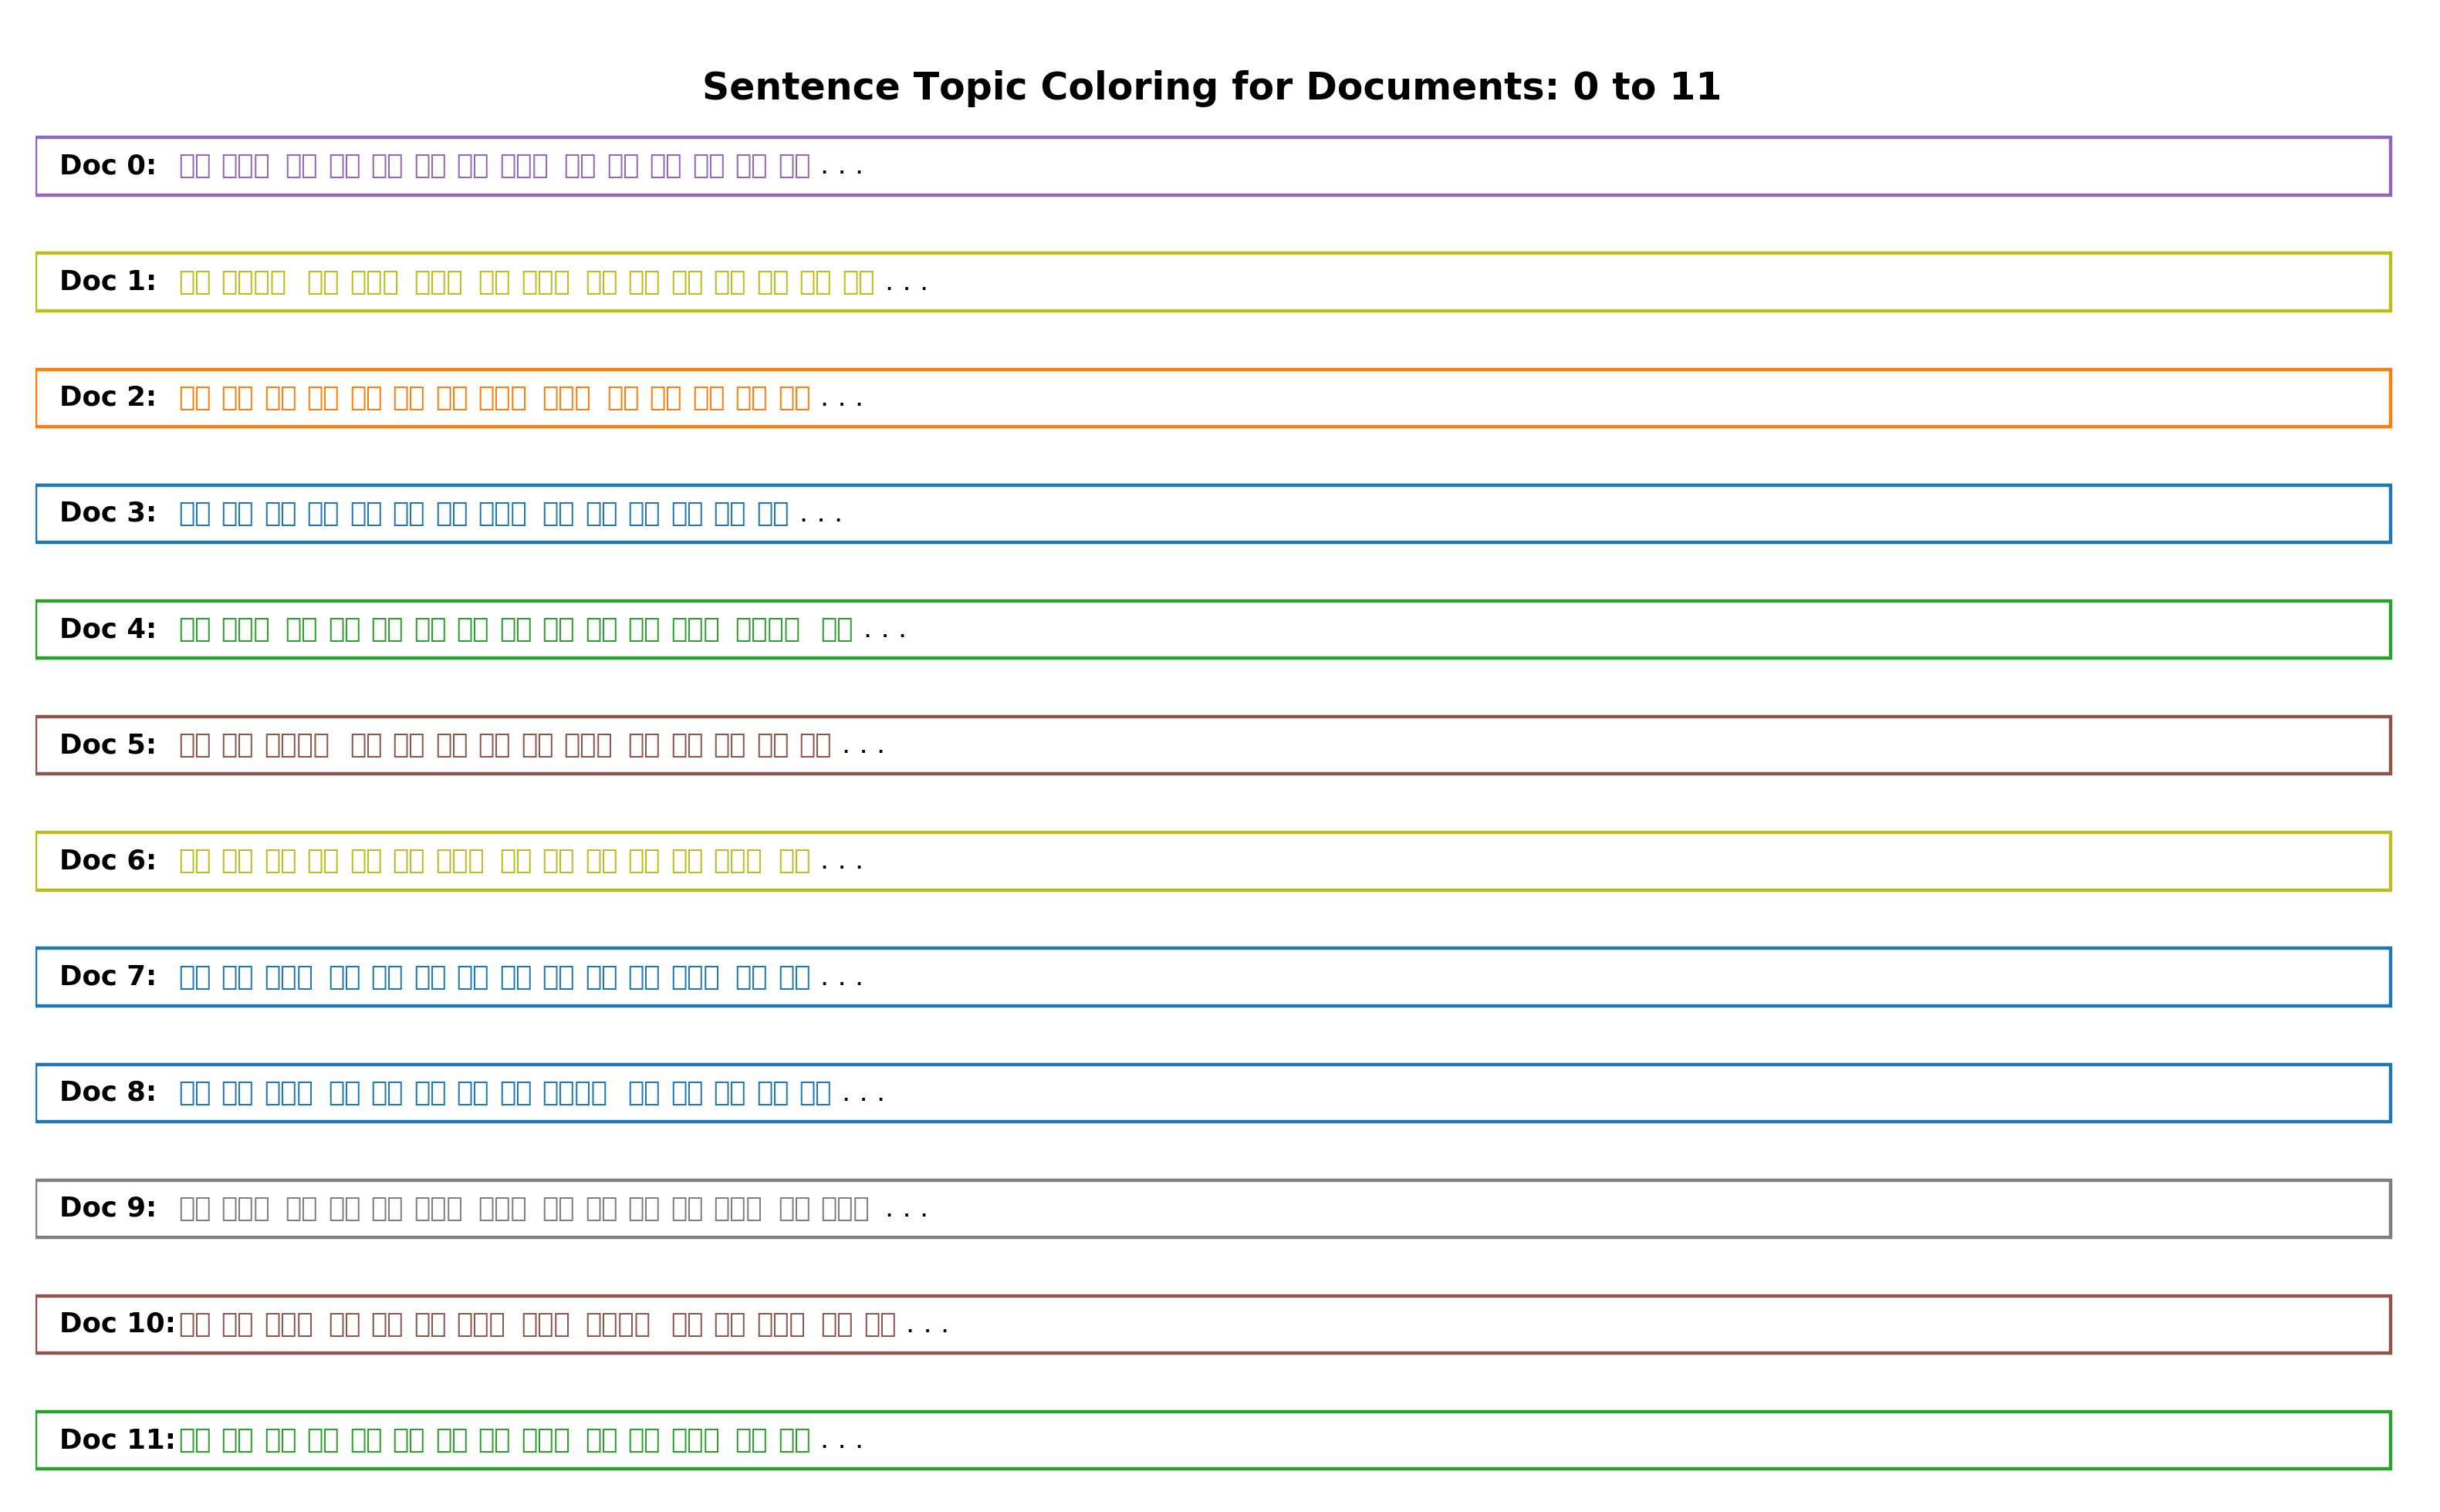

In [104]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
# -*- coding: utf-8 -*-
def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [105]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


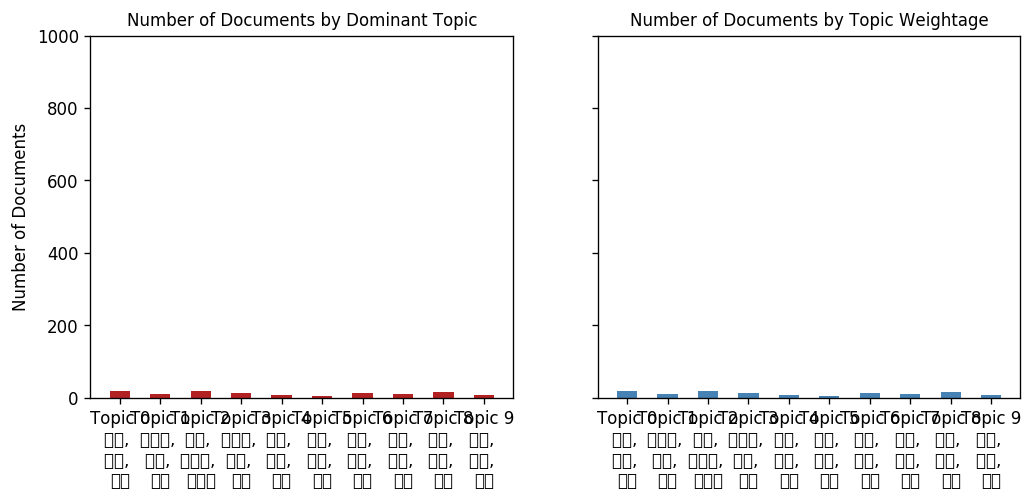

In [106]:
from matplotlib.ticker import FuncFormatter
#from pyplotz.pyplotz import PyplotZ
#pltz = PyplotZ()
#pltz.enable_chinese()

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [107]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 130 samples in 0.000s...
[t-SNE] Computed neighbors for 130 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 130 / 130
[t-SNE] Mean sigma: 0.002466
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.978867
[t-SNE] KL divergence after 700 iterations: 0.065162


Loading BokehJS ...

In [108]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.200285  0.062265       1        1  16.090517
2     -0.004002 -0.012824       2        1  14.745779
8      0.012540 -0.006812       3        1  14.691402
6      0.035981 -0.027871       4        1   9.072384
3      0.116402  0.145326       5        1   8.963550
1      0.017772 -0.010420       6        1   8.786690
7      0.021982 -0.145459       7        1   7.584739
4     -0.006978  0.001835       8        1   6.978861
9      0.006178 -0.001842       9        1   6.748563
5      0.000409 -0.004199      10        1   6.337510, topic_info=     Category       Freq Term      Total  loglift  logprob
term                                                      
692   Default   7.000000   伤心   7.000000  30.0000  30.0000
148   Default   9.000000   当时   9.000000  29.0000  29.0000
184   Default   6.000000   相思   6.000000  28.0000  28.0000
147   Default   8.000000   夕阳   8.000000  27.0000  27.0000
132   Default  11.000000  浣溪沙  11.000000  26.0000  26.0000
416   Default   6.000000   天涯   6.000000  25.0000  25.0000
1464  Default   5.000000   不成   5.000000  24.0000  24.0000
733   Default  10.000000   菩萨  10.000000  23.0000  23.0000
1477  Default   6.000000   鸳鸯   6.000000  22.0000  22.0000
475   Default   6.000000  蝶恋花   6.000000  21.0000  21.0000
717   Default   7.000000  清平乐   7.000000  20.0000  20.0000
321   Default   6.000000   一片   6.000000  19.0000  19.0000
528   Default   3.000000   燕子   3.000000  18.0000  18.0000
548   Default  13.000000   西风  13.000000  17.0000  17.0000
248   Default   5.000000   黄花   5.000000  16.0000  16.0000
1224  Default   5.000000  生查子   5.000000  15.0000  15.0000
1638  Default   4.000000   几许   4.000000  14.0000  14.0000
78    Default  10.000000   萧萧  10.000000  13.0000  13.0000
459   Default   4.000000   落花   4.000000  12.0000  12.0000
284   Default   3.000000   衰草   3.000000  11.0000  11.0000
1977  Default   2.000000   一程   2.000000  10.0000  10.0000
47    Default   4.000000   不语   4.000000   9.0000   9.0000
380   Default   4.000000   夜雨   4.000000   8.0000   8.0000
833   Default   4.000000   往事   4.000000   7.0000   7.0000
659   Default   4.000000   容易   4.000000   6.0000   6.0000
1236  Default   2.000000   清瘦   2.000000   5.0000   5.0000
806   Default   2.000000   夜寒   2.000000   4.0000   4.0000
810   Default   2.000000   悲咽   2.000000   3.0000   3.0000
1458  Default   2.000000   萧寺   2.000000   2.0000   2.0000
818   Default   2.000000   碧海   2.000000   1.0000   1.0000
...       ...        ...  ...        ...      ...      ...
805   Topic10   0.351514   填膺   0.867071   1.8558  -6.1578
825   Topic10   0.351514   重对   0.867071   1.8558  -6.1578
808   Topic10   0.351514   如雪   0.867071   1.8558  -6.1578
824   Topic10   0.351514   试问   0.867071   1.8558  -6.1578
811   Topic10   0.351514   惹下   0.867071   1.8558  -6.1578
812   Topic10   0.351514  捉迷藏   0.867071   1.8558  -6.1578
814   Topic10   0.351514   清辉   0.867071   1.8558  -6.1578
1443  Topic10   0.351514   承明   0.867071   1.8558  -6.1578
1431  Topic10   0.351514   不尽   0.867071   1.8558  -6.1578
1430  Topic10   0.351514   丈夫   0.867071   1.8558  -6.1578
1441  Topic10   0.351514   如意   0.867071   1.8558  -6.1578
1440  Topic10   0.351514   失意   0.867071   1.8558  -6.1578
1439  Topic10   0.351514   天公   0.867071   1.8558  -6.1578
1432  Topic10   0.351514   不羡   0.867071   1.8558  -6.1578
1461  Topic10   0.351514   野田   0.867071   1.8558  -6.1578
1444  Topic10   0.351514   料理   0.867071   1.8558  -6.1578
1446  Topic10   0.351514   更彻   0.867071   1.8558  -6.1578
1447  Topic10   0.351514   未肯   0.867071   1.8558  -6.1578
1445  Topic10   0.351514   曲慰   0.867071   1.8558  -6.1578
815   Topic10   0.351514   琵琶   0.867071   1.8558  -6.1578
823   Topic10   0.351514   记否   0.867071   1.8558  -6.1578
809   Topic10   0.351514   小扇   0.867071   1.8558  -6.1578
226   Topic10   0.647252   旧时   2.803013   1.2930  -5.5473
822  

In [56]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [48]:
# Visualize
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[4], corpus, id2word)  # sort=False ? sort=True
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
29    -0.252678 -0.027241       1        1  6.992234
7      0.044417 -0.214989       2        1  6.232903
5      0.003838  0.016409       3        1  6.039353
24     0.024958  0.025287       4        1  5.286853
6      0.014455  0.030432       5        1  4.840850
3      0.026771  0.011673       6        1  4.796665
25     0.021612  0.000645       7        1  4.139153
16     0.011884  0.018828       8        1  3.915804
10     0.010300  0.017975       9        1  3.892086
2      0.011612  0.018522      10        1  3.797735
8      0.013096  0.005722      11        1  3.778869
15    -0.004258  0.017530      12        1  3.609063
11     0.008235  0.014939      13        1  3.531890
22     0.009001  0.014250      14        1  3.373749
23     0.008840  0.011760      15        1  3.347772
4     -0.002059  0.008974      16        1  3.079005
28     0.010716  0.014998      17        1  2.976364
14     0.006500  0.005811      18        1  2.457004
20     0.005441  0.006015      19        1  2.394587
13     0.000311 -0.010412      20        1  2.380824
9     -0.004443  0.002332      21        1  2.225606
0      0.004676  0.005581      22        1  2.174530
27     0.006173 -0.004726      23        1  2.068024
19     0.003094  0.004876      24        1  2.045135
12     0.004108  0.003189      25        1  2.037877
1      0.002190  0.001450      26        1  1.917938
17     0.002499  0.003197      27        1  1.887631
21     0.004322 -0.005850      28        1  1.812703
18     0.004158  0.003870      29        1  1.671160
26     0.000232 -0.001047      30        1  1.296636, topic_info=     Category       Freq Term      Total  loglift  logprob
term                                                      
36    Default  20.000000  浣溪沙  20.000000  30.0000  30.0000
242   Default  11.000000   菩萨  11.000000  29.0000  29.0000
20    Default  11.000000  采桑子  11.000000  28.0000  28.0000
232   Default  10.000000  清平乐  10.000000  27.0000  27.0000
148   Default   3.000000   黄昏   3.000000  26.0000  26.0000
7     Default   3.000000  临江仙   3.000000  25.0000  25.0000
68    Default   4.000000   旧时   4.000000  24.0000  24.0000
335   Default   2.000000   惆怅   2.000000  23.0000  23.0000
431   Default   2.000000   金缕   2.000000  22.0000  22.0000
176   Default   3.000000   时节   3.000000  21.0000  21.0000
243   Default   3.000000   萧萧   3.000000  20.0000  20.0000
403   Default   3.000000   无语   3.000000  19.0000  19.0000
142   Default   3.000000  蝶恋花   3.000000  18.0000  18.0000
141   Default   3.000000  相思树   3.000000  17.0000  17.0000
336   Default   2.000000   画角   2.000000  16.0000  16.0000
187   Default   2.000000   何时   2.000000  15.0000  15.0000
542   Default   2.000000   寄愁   2.000000  14.0000  14.0000
282   Default   3.000000   故园   3.000000  13.0000  13.0000
297   Default   3.000000  心欲碎   3.000000  12.0000  12.0000
48    Default   3.000000   深秋   3.000000  11.0000  11.0000
444   Default   3.000000   冰雪   3.000000  10.0000  10.0000
451   Default   3.000000   牧马   3.000000   9.0000   9.0000
158   Default   3.000000  南乡子   3.000000   8.0000   8.0000
39    Default   2.000000   人间   2.000000   7.0000   7.0000
42    Default   2.000000  虞美人   2.000000   6.0000   6.0000
34    Default   3.000000   多情   3.000000   5.0000   5.0000
133   Default   1.000000   可怜   1.000000   4.0000   4.0000
128   Default   1.000000  木兰花   1.000000   3.0000   3.0000
154   Default   1.000000   一种   1.000000   2.0000   2.0000
64    Default   1.000000  浪淘沙   1.000000   1.0000   1.0000
...       ...        ...  ...        ...      ...      ...
602   Topic30   0.013012   晓星   0.702229   0.3570  -6.7119
603   Topic30   0.013012   自起   0.702229   0.3570  -6.7119
604   Topic30   0.013012   一灯   0.702228   0.3570  -6.7119
584   Topic30   0.013012   数行   0.702229   0.3570  -6.7119
585   Topic30   0.013012  未歇花   0.702229   0.3570  -6.7119
583   Topic30   0.0

In [57]:
%%time

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])
print('\n')

['南楼', '塞外', '重九', '古木向', '人秋', '惊蓬', '重阳', '何处', '堪愁', '记得', '当年', '惆怅', '风雨', '南楼', '断梦', '几能', '香魂', '一哭', '怪凉', '空满', '霜落', '乌啼浑', '偏想', '风流']


CPU times: user 91.4 ms, sys: 3 ms, total: 94.4 ms
Wall time: 102 ms
